In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers # type: ignore
from datetime import datetime
import cv2
import time


# Import Data

In [6]:
data_train_path='./dataset/newDatasetSplit/train'
data_test_path='./dataset/newDatasetSplit/test'
data_val_path='./dataset/newDatasetSplit/val/'

In [7]:
img_width = 180
img_height = 180

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 3675 files belonging to 25 classes.


In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 17125 files belonging to 25 classes.


In [10]:
data_cat = data_train.class_names
print(data_cat)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '25']


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 3700 files belonging to 25 classes.


2025-05-03 10:31:18.769197: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


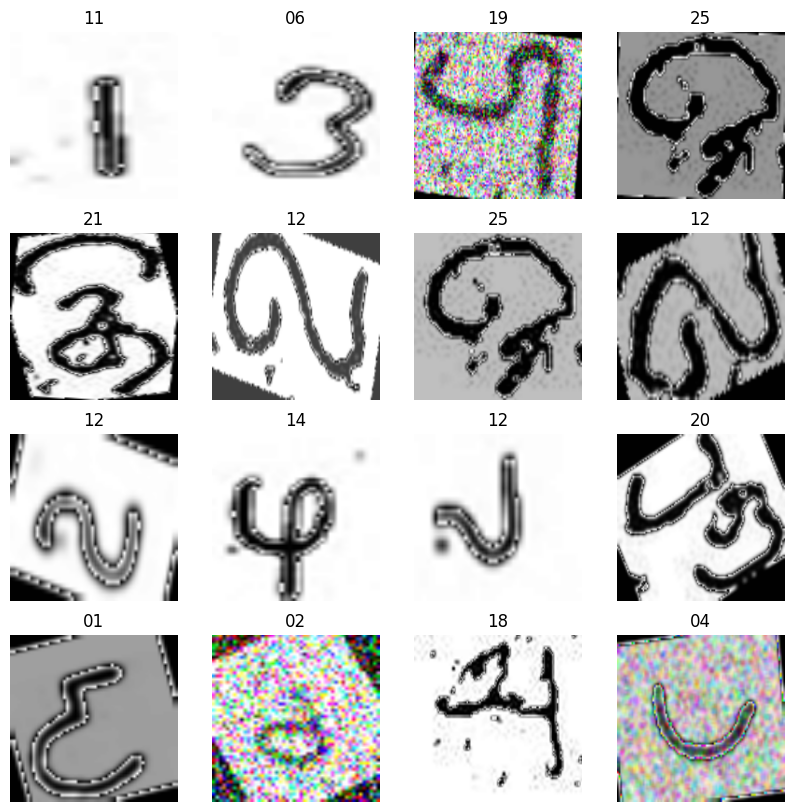

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

# Building Model

In [12]:
from tensorflow.keras.models import Sequential # type: ignore

## Checking GPU

In [10]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


## Pushing Model in GPU

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    # Print GPU details
    print(f"Using GPU: {tf.config.experimental.get_device_details(gpus[0])['device_name']}")
    with tf.device('/GPU:0'):
        # Define your model architecture
        model = Sequential([
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3, padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.Dense(len(data_cat))

    ])

        # Compile the model
        model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
else:
    print("No GPU detected, running on CPU.")

Using GPU: NVIDIA GeForce RTX 3050 Laptop GPU


In [34]:
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.models import load_model
if gpus:
    # Print GPU details
    print(f"Using GPU: {tf.config.experimental.get_device_details(gpus[0])['device_name']}")
    with tf.device('/GPU:0'):
        model = Sequential([
            layers.Input(shape=(img_height, img_width, 3)),  # Replace with your actual size

            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Dropout(0.25),

            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Dropout(0.25),

            layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Dropout(0.3),

            layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Dropout(0.3),

            layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Dropout(0.4),

            layers.GlobalAveragePooling2D(),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(data_cat), activation='softmax')
        ])


Using GPU: NVIDIA GeForce RTX 3050 Laptop GPU


# LOAD MODEL

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
epochs_size = 32

2025-05-03 13:50:28.286622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746280232.293720  170465 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746280233.418409  170465 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746280241.148535  170465 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746280241.148602  170465 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746280241.148605  170465 computation_placer.cc:177] computation placer alr

In [ ]:
# # save model
model.save('gfgModel.h5')
print('Model Saved!')
#! load model
savedModel=load_model('gfgModel.h5')
savedModel.summary()

I0000 00:00:1746280443.055402  170465 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,991,867 (15.23 MB)

 Trainable params: 3,991,865 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Fitting Data

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(data_train,validation_data=data_test, epochs=epochs_size)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 22, 22, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,496,057 (9.52 MB)

 Trainable params: 2,493,113 (9.51 MB)

 Non-trainable params: 2,944 (11.50 KB)

Epoch 1/32


2025-05-03 13:11:21.021799: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4568', 188 bytes spill stores, 188 bytes spill loads

2025-05-03 13:11:23.395135: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5916', 36 bytes spill stores, 44 bytes spill loads

2025-05-03 13:11:23.586115: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5916', 56 bytes spill stores, 56 bytes spill loads

2025-05-03 13:11:24.376566: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5064', 12 bytes spill stores, 16 bytes spill loads

2025-05-03 13:11:25.336806: I external

535/536 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.2640 - loss: 2.6301

2025-05-03 13:13:45.734242: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4568', 8 bytes spill stores, 8 bytes spill loads

2025-05-03 13:13:46.091264: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4568', 104 bytes spill stores, 104 bytes spill loads



536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.2644 - loss: 2.6286

2025-05-03 13:14:17.685850: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_303', 8 bytes spill stores, 8 bytes spill loads

2025-05-03 13:14:35.692261: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_296', 200 bytes spill stores, 200 bytes spill loads

2025-05-03 13:14:35.755291: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_296', 4 bytes spill stores, 4 bytes spill loads



536/536 ━━━━━━━━━━━━━━━━━━━━ 223s 288ms/step - accuracy: 0.2647 - loss: 2.6271 - val_accuracy: 0.2100 - val_loss: 3.7892
Epoch 2/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 96s 179ms/step - accuracy: 0.8399 - loss: 0.5366 - val_accuracy: 0.7454 - val_loss: 1.0280
Epoch 3/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 96s 180ms/step - accuracy: 0.9337 - loss: 0.2175 - val_accuracy: 0.8697 - val_loss: 0.8946
Epoch 4/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 97s 180ms/step - accuracy: 0.9638 - loss: 0.1197 - val_accuracy: 0.9770 - val_loss: 0.0817
Epoch 5/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 97s 181ms/step - accuracy: 0.9655 - loss: 0.1130 - val_accuracy: 0.9881 - val_loss: 0.0392
Epoch 6/32
536/536 ━━━━━━━━━━━━━━━━━━━━ 97s 181ms/step - accuracy: 0.9702 - loss: 0.0997 - val_accuracy: 0.9911 - val_loss: 0.0315
Epoch 7/32
535/536 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9868 - loss: 0.0461

KeyboardInterrupt: 

Text(0.5, 1.0, 'Loss')

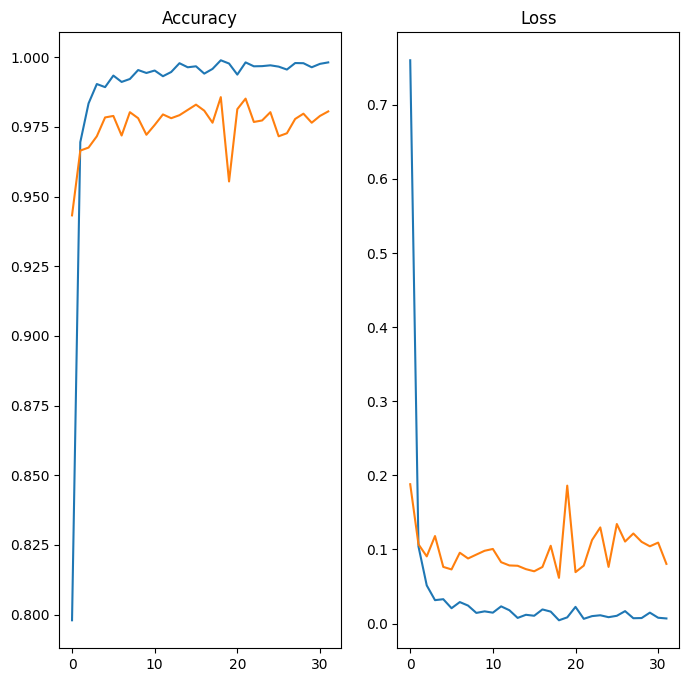

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [21]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the saved model
model = load_model('./gfgModel.h5')

# Define your test dataset
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,  # Important to keep order for label alignment
    image_size=(img_width, img_height),
    batch_size=32
)

# Get class names
class_names = data_test.class_names  # Should match ['00', '01', ..., '25'] except '23' missing

# Prepare true labels and images
y_true = []
y_pred = []

for images, labels in data_test:
    preds = model.predict(images)
    preds_class = np.argmax(preds, axis=1)
    y_pred.extend(preds_class)
    y_true.extend(labels.numpy())

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

# Print results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Found 3700 files belonging to 25 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

2025-05-03 14:09:27.707834: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
from tensorflow.keras.models import load_model
from sklearn.metrics import f1_score
import numpy as np

# 1. Load the saved model
savedModel = load_model('./gfgModel.h5')

# 2. Get predictions on validation/test data
y_pred_probs = savedModel.predict(data_val)  # data_val must be the same format as during training
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. Extract true labels
try:
    # If using ImageDataGenerator or similar
    y_true = data_val.classes
except AttributeError:
    # If using tf.data.Dataset
    y_true = np.concatenate([y for x, y in data_val], axis=0)

# 4. Compute F1 score
f1 = f1_score(y_true, y_pred, average='macro')  # or 'macro' as needed

print(f"Final Weighted F1 Score from saved model: {f1:.4f}")

115/115 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step
Final Weighted F1 Score from saved model: 0.0421


2025-05-03 14:02:53.595732: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Using Image File

In [16]:
image_path = './bhoto.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Normalize pixel values to be between 0 and 1
img_bat = img_array
predict = savedModel.predict(img_bat)
score = tf.nn.softmax(predict)
predicted_category = np.argmax(score)
accuracy = np.max(score) * 100
print(f"Predicted category: {data_cat[predicted_category]}")
print(f"Prediction accuracy: {accuracy:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted category: 08
Prediction accuracy: 99.64%


In [ ]:

print('Veg/Fruit in image is {} with accuracy of {:0.2f}% and estimated shelf life of {} days'.format(
            data_cat[predicted_category],
            accuracy,))

NameError: name 'predicted_shelf_life' is not defined

In [19]:
from sklearn.metrics import classification_report

# Show detailed classification metrics per class
print(classification_report(y_true, y_pred, target_names=data_cat))


              precision    recall  f1-score   support

          00       0.06      0.06      0.06       150
          01       0.05      0.05      0.05       150
          02       0.06      0.06      0.06       150
          03       0.04      0.04      0.04       150
          04       0.04      0.04      0.04       150
          05       0.01      0.01      0.01       150
          06       0.03      0.03      0.03       150
          07       0.05      0.05      0.05       150
          08       0.02      0.02      0.02       150
          09       0.05      0.05      0.05       150
          10       0.08      0.08      0.08       150
          11       0.04      0.04      0.04       150
          12       0.02      0.02      0.02       150
          13       0.07      0.07      0.07       150
          14       0.03      0.03      0.03       150
          15       0.04      0.04      0.04       150
          16       0.04      0.04      0.04       150
          17       0.04    

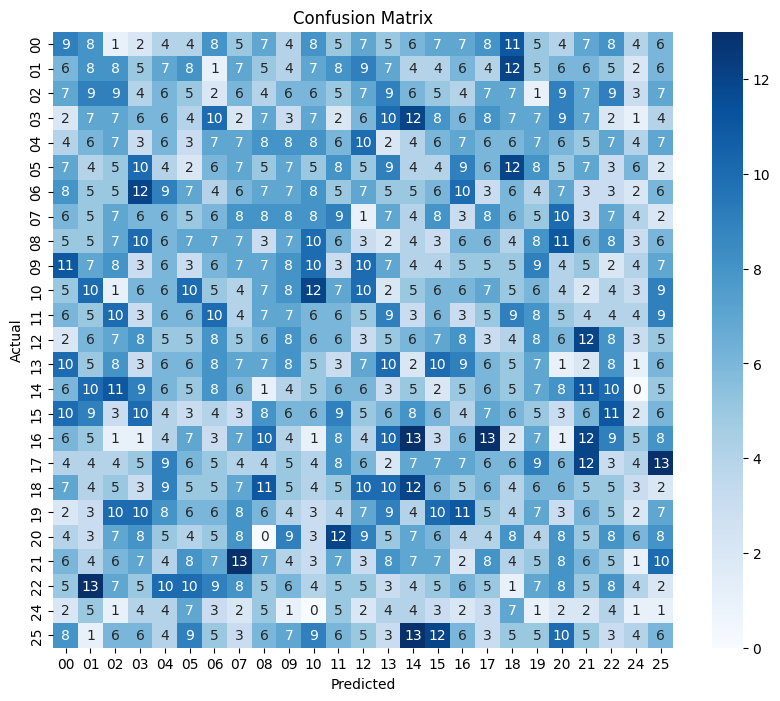

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    './dataset/newDataset/',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    './dataset/newDataset/',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
)

num_classes = len(train_generator.class_indices)


Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.


In [30]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


In [31]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/mnt/c/Users/Pavan Sarvesh/tf-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-05-03 10:54:40.472739: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1717', 8 bytes spill stores, 8 bytes spill loads



625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.2215 - loss: 2.7865

2025-05-03 11:00:03.027729: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 204 bytes spill stores, 204 bytes spill loads

2025-05-03 11:00:03.097255: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167_0', 464 bytes spill stores, 1372 bytes spill loads

2025-05-03 11:00:03.866637: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 5340 bytes spill stores, 5324 bytes spill loads

2025-05-03 11:00:03.868807: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 5616 bytes spill stores, 5612 bytes spill loads

2025-05-03 11:01:25.66844

625/625 ━━━━━━━━━━━━━━━━━━━━ 418s 645ms/step - accuracy: 0.2217 - loss: 2.7856 - val_accuracy: 0.3904 - val_loss: 2.3155
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 238s 381ms/step - accuracy: 0.6309 - loss: 1.2996 - val_accuracy: 0.4480 - val_loss: 2.0059
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 239s 382ms/step - accuracy: 0.7203 - loss: 0.9607 - val_accuracy: 0.4816 - val_loss: 1.8964
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 237s 379ms/step - accuracy: 0.7615 - loss: 0.7956 - val_accuracy: 0.5042 - val_loss: 1.8384
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 239s 382ms/step - accuracy: 0.7858 - loss: 0.7110 - val_accuracy: 0.5426 - val_loss: 1.7085
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 237s 380ms/step - accuracy: 0.8014 - loss: 0.6538 - val_accuracy: 0.5382 - val_loss: 1.7064
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 238s 381ms/step - accuracy: 0.8223 - loss: 0.5929 - val_accuracy: 0.5484 - val_loss: 1.6827
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 237s 379ms/step - accuracy: 0.8264 - loss: 0.56

In [32]:
from sklearn.metrics import f1_score
import numpy as np

y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 152s 910ms/step
F1 Score: 0.0382
